# API documentation

The functions below are part of the pypo module and are
separted below based on their functionality.

## Conventional mapping (AIS to AOS)

### Forward mapping

```{eval-rst}
.. autofunction:: pyprop.AIS2AOS_map
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing PyPO and Numpy:

In [1]:
    from pyprop import AIS2AOS_map
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [2]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds, as well as the discretization resolution:

In [3]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    resolution =  [5, 5]

Obtain discretized AIS/AOS.

In [4]:
    AIS, AOS =  AIS2AOS_map(shower_problem, AIS_bounds,  resolution)
    print(AOS)

[[[  0.       90.     ]
  [  2.5     120.     ]
  [  5.      120.     ]
  [  7.5     120.     ]
  [ 10.      120.     ]]

 [[  2.5      60.     ]
  [  5.       90.     ]
  [  7.5     100.     ]
  [ 10.      105.     ]
  [ 12.5     108.     ]]

 [[  5.       60.     ]
  [  7.5      80.     ]
  [ 10.       90.     ]
  [ 12.5      96.     ]
  [ 15.      100.     ]]

 [[  7.5      60.     ]
  [ 10.       75.     ]
  [ 12.5      84.     ]
  [ 15.       90.     ]
  [ 17.5      94.28571]]

 [[ 10.       60.     ]
  [ 12.5      72.     ]
  [ 15.       80.     ]
  [ 17.5      85.71429]
  [ 20.       90.     ]]]


### Inverse mapping (AOS/DOS to AIS/DIS)

### NLP-Based

```{eval-rst}
.. autofunction:: pyprop.nlp_based_approach
```

###### Example
Obtaining the Feasible Desired Input Set (DIS*) for the shower problem.

Importing PyPO and Numpy:

In [5]:
    import numpy as np
    from pyprop import nlp_based_approach

Defining lower and upper bound for the AIS/DIS inverse map:

In [6]:
    lb = np.array([0, 0])
    ub = np.array([100,100])

Defining DOS bounds and resolution to obtain the inverse map:

In [7]:
    DOS_bound = np.array([[17.5, 21.0],
                          [80.0, 100.0]])
    resolution = [10, 10]

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [8]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Obtaining the DIS*, DOS* and the convergence for each inverse map run. 
Additionally, using IPOPT as NLP solver, enabling plotting of the process operability
sets, cold-starting the
NLP and using finite-differences:

  0%|                                                                                                                                | 0/100 [00:00<?, ?it/s]

  2%|██▍                                                                                                                     | 2/100 [00:00<00:07, 13.02it/s]

  4%|████▊                                                                                                                   | 4/100 [00:00<00:07, 13.63it/s]

  6%|███████▏                                                                                                                | 6/100 [00:00<00:07, 13.35it/s]

  8%|█████████▌                                                                                                              | 8/100 [00:00<00:06, 13.61it/s]

 10%|███████████▉                                                                                                           | 10/100 [00:00<00:06, 13.76it/s]

 12%|██████████████▎                                                                                                        | 12/100 [00:00<00:06, 13.53it/s]

 14%|████████████████▋                                                                                                      | 14/100 [00:01<00:06, 13.42it/s]

 16%|███████████████████                                                                                                    | 16/100 [00:01<00:06, 13.31it/s]

 18%|█████████████████████▍                                                                                                 | 18/100 [00:01<00:06, 13.52it/s]

 20%|███████████████████████▊                                                                                               | 20/100 [00:01<00:05, 13.98it/s]

 22%|██████████████████████████▏                                                                                            | 22/100 [00:01<00:05, 13.69it/s]

 24%|████████████████████████████▌                                                                                          | 24/100 [00:01<00:05, 13.53it/s]

 26%|██████████████████████████████▉                                                                                        | 26/100 [00:01<00:05, 13.42it/s]

 28%|█████████████████████████████████▎                                                                                     | 28/100 [00:02<00:05, 13.50it/s]

 30%|███████████████████████████████████▋                                                                                   | 30/100 [00:02<00:05, 13.99it/s]

 32%|██████████████████████████████████████                                                                                 | 32/100 [00:02<00:05, 13.59it/s]

 34%|████████████████████████████████████████▍                                                                              | 34/100 [00:02<00:05, 13.12it/s]

 36%|██████████████████████████████████████████▊                                                                            | 36/100 [00:02<00:04, 12.85it/s]

 38%|█████████████████████████████████████████████▏                                                                         | 38/100 [00:02<00:04, 12.97it/s]

 40%|███████████████████████████████████████████████▌                                                                       | 40/100 [00:02<00:04, 13.56it/s]

 42%|█████████████████████████████████████████████████▉                                                                     | 42/100 [00:03<00:04, 13.15it/s]

 44%|████████████████████████████████████████████████████▎                                                                  | 44/100 [00:03<00:04, 12.95it/s]

 46%|██████████████████████████████████████████████████████▋                                                                | 46/100 [00:03<00:04, 12.52it/s]

 48%|█████████████████████████████████████████████████████████                                                              | 48/100 [00:03<00:04, 12.73it/s]

 50%|███████████████████████████████████████████████████████████▌                                                           | 50/100 [00:03<00:03, 13.30it/s]

 52%|█████████████████████████████████████████████████████████████▉                                                         | 52/100 [00:03<00:03, 12.82it/s]

 54%|████████████████████████████████████████████████████████████████▎                                                      | 54/100 [00:04<00:03, 12.70it/s]

 56%|██████████████████████████████████████████████████████████████████▋                                                    | 56/100 [00:04<00:03, 12.72it/s]

 58%|█████████████████████████████████████████████████████████████████████                                                  | 58/100 [00:04<00:03, 13.00it/s]

 60%|███████████████████████████████████████████████████████████████████████▍                                               | 60/100 [00:04<00:03, 13.23it/s]

 62%|█████████████████████████████████████████████████████████████████████████▊                                             | 62/100 [00:04<00:02, 12.73it/s]

 64%|████████████████████████████████████████████████████████████████████████████▏                                          | 64/100 [00:04<00:02, 12.61it/s]

 66%|██████████████████████████████████████████████████████████████████████████████▌                                        | 66/100 [00:05<00:02, 12.40it/s]

 68%|████████████████████████████████████████████████████████████████████████████████▉                                      | 68/100 [00:05<00:02, 12.62it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████▎                                   | 70/100 [00:05<00:02, 13.05it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████▋                                 | 72/100 [00:05<00:02, 12.38it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████                               | 74/100 [00:05<00:02, 12.40it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████▍                            | 76/100 [00:05<00:01, 12.41it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████▊                          | 78/100 [00:05<00:01, 12.65it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████▏                       | 80/100 [00:06<00:01, 13.13it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 82/100 [00:06<00:01, 12.52it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 84/100 [00:06<00:01, 12.47it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 86/100 [00:06<00:01, 12.34it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 88/100 [00:06<00:00, 12.87it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████            | 90/100 [00:06<00:00, 13.27it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 92/100 [00:07<00:00, 12.68it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 94/100 [00:07<00:00, 12.68it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 96/100 [00:07<00:00, 12.72it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 98/100 [00:07<00:00, 13.26it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.61it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.06it/s]

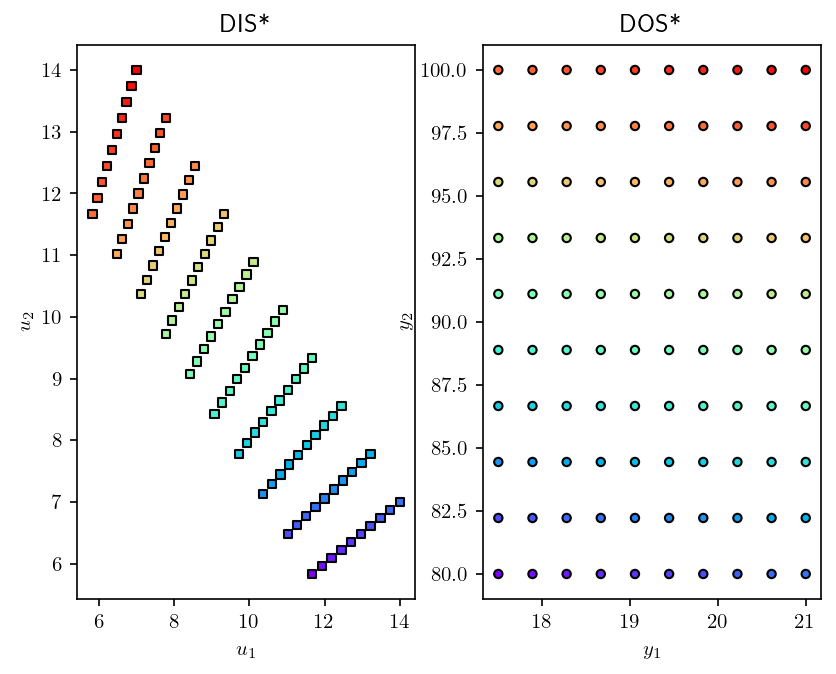

In [9]:
    u0 = u0 = np.array([0, 10]) # Initial estimate for inverse mapping.
    fDIS, fDOS, message = nlp_based_approach(DOS_bound, 
                                             resolution, 
                                             shower_problem, 
                                             u0, 
                                             lb,
                                             ub, 
                                             method='ipopt', 
                                             plot=True, 
                                             ad=False,
                                             warmstart=False)

## Implicit mapping

```{eval-rst}
.. autofunction:: pyprop.implicit_map
```

## Multimodel representation

```{eval-rst}
.. autofunction:: pyprop.multimodel_rep
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing PyPO and Numpy:

In [10]:
    from pyprop import multimodel_rep
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [11]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [12]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    AIS_resolution =  [5, 5]

Obtaining multimodel representation of paired polytopes for the AOS:

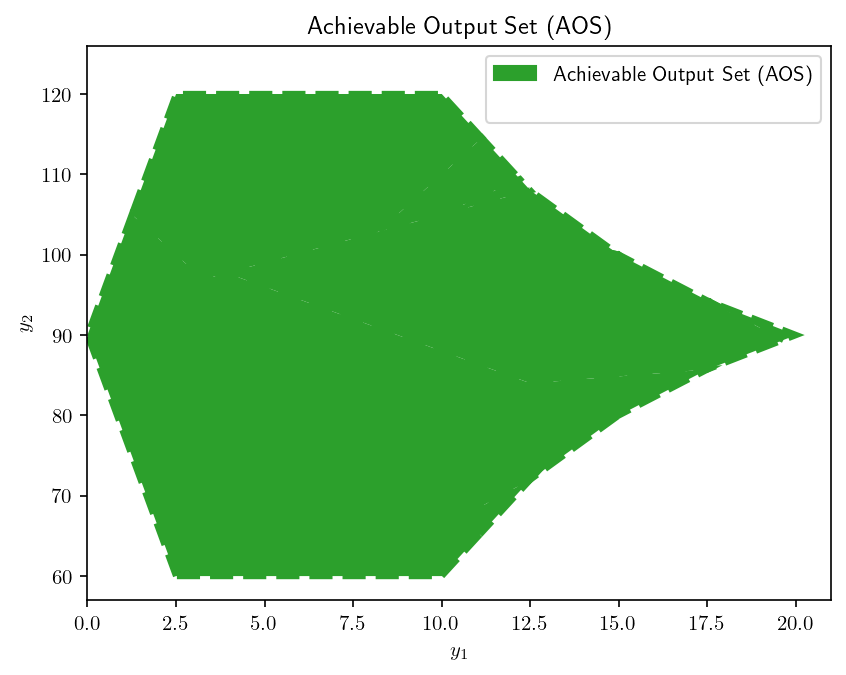

In [13]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem)

## OI evaluation

```{eval-rst}
.. autofunction:: pyprop.OI_calc
```

###### Example
Evaluating the OI for the shower problem for a given DOS.

Importing PyPO and Numpy:

In [14]:
    from pyprop import multimodel_rep, OI_calc
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [15]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [16]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    AIS_resolution =  [5, 5]

Obtaining multimodel representation of paired polytopes for the AOS:

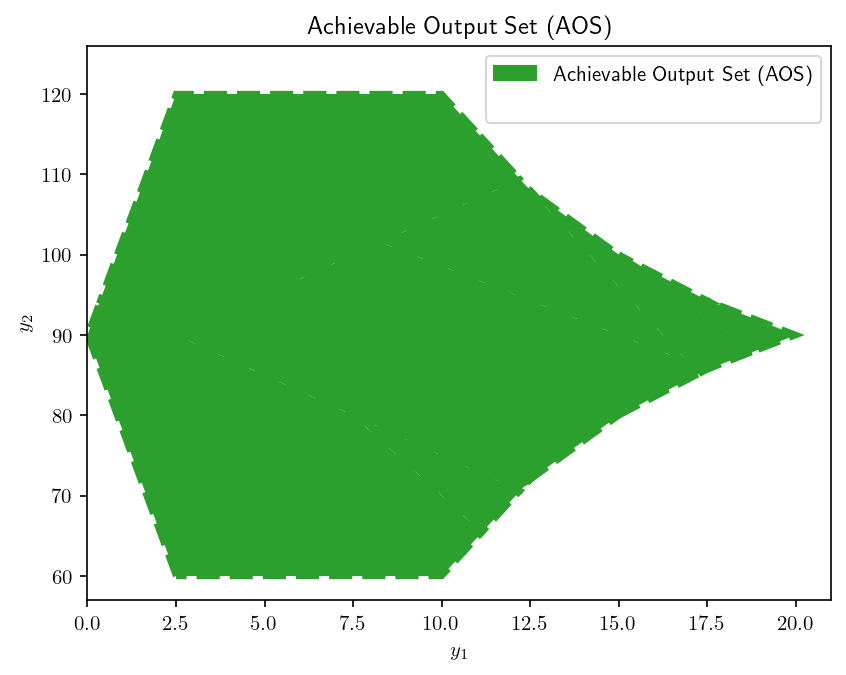

In [17]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem)

Defining a DOS region between $y_1 =[10-20], y_2=[70-100]$

In [18]:
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

Evaluating the OI and seeing the intersection between the operability sets:

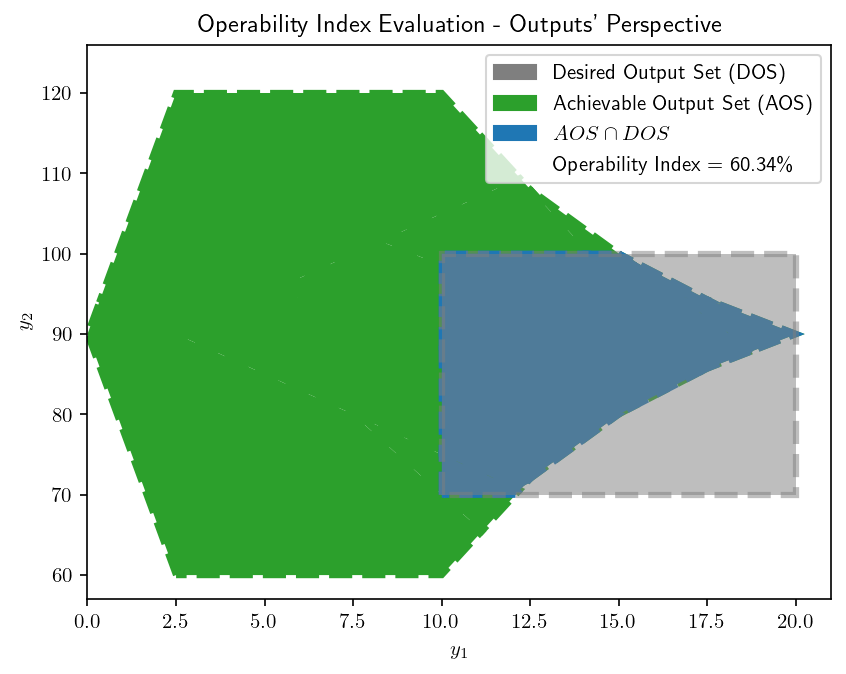

In [19]:
    OI = OI_calc(AOS_region, DOS_bounds)

## Utilities

```{eval-rst}
.. autofunction:: pyprop.create_grid
```
###### Example
Creating a 2-dimensional discretized rectangular grid for given DOS bounds.

In [20]:
    from pyprop import create_grid
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])
    DOS_resolution =  [5, 5]
    DOSPts = create_grid(DOS_bounds, DOS_resolution)
    print(DOSPts)

[[[ 10.   70. ]
  [ 10.   77.5]
  [ 10.   85. ]
  [ 10.   92.5]
  [ 10.  100. ]]

 [[ 12.5  70. ]
  [ 12.5  77.5]
  [ 12.5  85. ]
  [ 12.5  92.5]
  [ 12.5 100. ]]

 [[ 15.   70. ]
  [ 15.   77.5]
  [ 15.   85. ]
  [ 15.   92.5]
  [ 15.  100. ]]

 [[ 17.5  70. ]
  [ 17.5  77.5]
  [ 17.5  85. ]
  [ 17.5  92.5]
  [ 17.5 100. ]]

 [[ 20.   70. ]
  [ 20.   77.5]
  [ 20.   85. ]
  [ 20.   92.5]
  [ 20.  100. ]]]


Visualizing this grid:

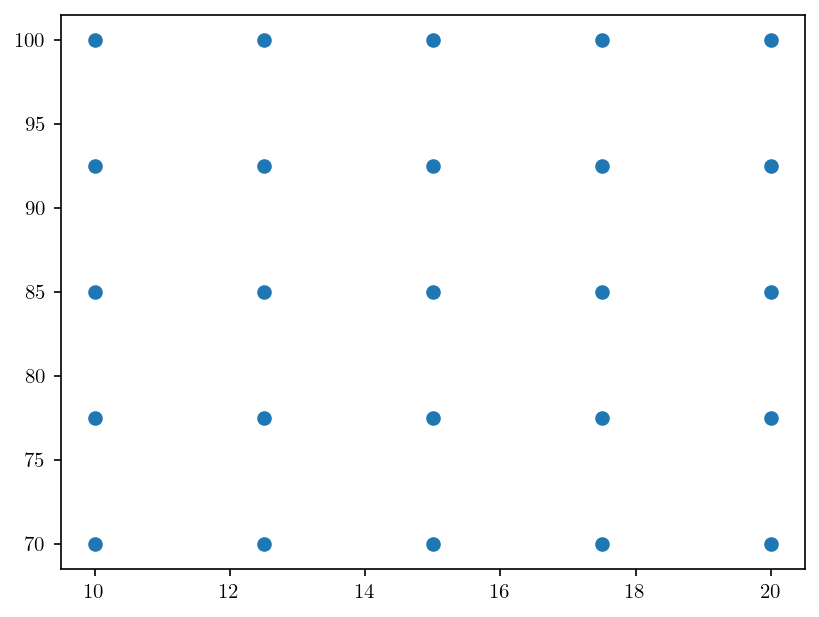

In [21]:
    import matplotlib.pyplot as plt
    DOSPts = DOSPts.reshape(-1, 2)
    plt.scatter(DOSPts[:, 0], DOSPts[:, 1])

```{eval-rst}
.. autofunction:: pyprop.points2simplices
```

###### Example
Generating paired simplicial polytopes for the AIS/AOS generated for the
shower problem example.

In [22]:
    from pyprop import points2simplices
    AIS_poly, AOS_poly = points2simplices(AIS,AOS)
    print('AIS Simplices', AIS_poly)
    print('AOS Simplices', AOS_poly)

AIS Simplices [array([[2.5, 0. , 0. ],
       [2.5, 2.5, 0. ]]), array([[2.5, 2.5, 0. ],
       [2.5, 0. , 0. ]]), array([[5. , 2.5, 2.5],
       [2.5, 2.5, 0. ]]), array([[5. , 5. , 2.5],
       [2.5, 0. , 0. ]]), array([[7.5, 5. , 5. ],
       [2.5, 2.5, 0. ]]), array([[7.5, 7.5, 5. ],
       [2.5, 0. , 0. ]]), array([[10. ,  7.5,  7.5],
       [ 2.5,  2.5,  0. ]]), array([[10. , 10. ,  7.5],
       [ 2.5,  0. ,  0. ]]), array([[2.5, 0. , 0. ],
       [5. , 5. , 2.5]]), array([[2.5, 2.5, 0. ],
       [5. , 2.5, 2.5]]), array([[5. , 2.5, 2.5],
       [5. , 5. , 2.5]]), array([[5. , 5. , 2.5],
       [5. , 2.5, 2.5]]), array([[7.5, 5. , 5. ],
       [5. , 5. , 2.5]]), array([[7.5, 7.5, 5. ],
       [5. , 2.5, 2.5]]), array([[10. ,  7.5,  7.5],
       [ 5. ,  5. ,  2.5]]), array([[10. , 10. ,  7.5],
       [ 5. ,  2.5,  2.5]]), array([[2.5, 0. , 0. ],
       [7.5, 7.5, 5. ]]), array([[2.5, 2.5, 0. ],
       [7.5, 5. , 5. ]]), array([[5. , 2.5, 2.5],
       [7.5, 7.5, 5. ]]), array([[5. 

```{eval-rst}
.. autofunction:: pyprop.points2polyhedra


```

```{eval-rst}
.. autosummary::
   :toctree: _autosummary
   :recursive:

   pyprop
```